# Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bring the dataset from the database

In [23]:
df = pd.read_csv("Dataset.csv", sep=',')
df.head()

,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


# Description

In [24]:
df.describe()

,User Score,User Ratings Count
count,11714.000000,11299.000000
mean,6.894852,245.642977
std,1.392213,1847.895353
min,0.300000,5.000000
25%,6.200000,14.000000
50%,7.200000,34.000000
75%,7.900000,111.000000
max,10.000000,163419.000000


# Data type

In [25]:
df.dtypes

Title                  object
Release Date           object
Developer              object
Publisher              object
Genres                 object
Product Rating         object
User Score            float64
User Ratings Count    float64
Platforms Info         object
dtype: object

# General information of the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Product Rating      11005 non-null  object 
 6   User Score          11714 non-null  float64
 7   User Ratings Count  11299 non-null  float64
 8   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(7)
memory usage: 988.4+ KB


# Convert data

In [28]:
df1 = df.convert_dtypes() 
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  string 
 1   Release Date        13991 non-null  string 
 2   Developer           13917 non-null  string 
 3   Publisher           13917 non-null  string 
 4   Genres              14034 non-null  string 
 5   Product Rating      11005 non-null  string 
 6   User Score          11714 non-null  Float64
 7   User Ratings Count  11299 non-null  Int64  
 8   Platforms Info      14055 non-null  string 
dtypes: Float64(1), Int64(1), string(7)
memory usage: 1015.8 KB


In [ ]:
# Download csv df1

# Number of rows and columns

In [29]:
print(df.shape)
print(type(df.shape)) #Returns a tuple of the form: ("number of rows", "number of columns")

(14055, 9)
<class 'tuple'>


In [30]:

num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

print(f"Type: {type(df.shape)}")


Number of rows: 14055
Number of columns: 9
Type: <class 'tuple'>


# Unique values

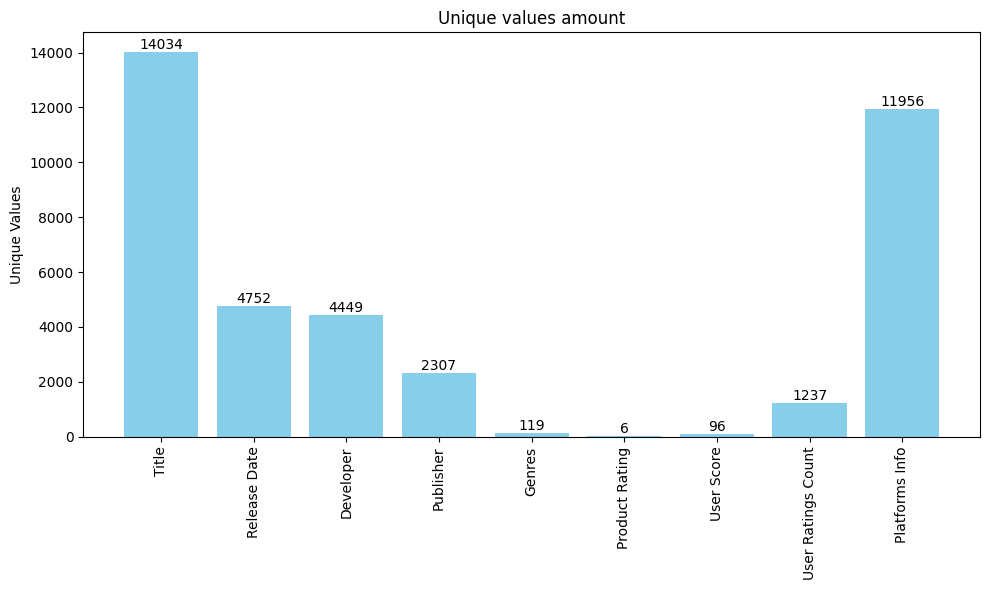

In [31]:
unique_amount = df.nunique()

plt.figure(figsize=(10, 6))

bars = plt.bar(unique_amount.index, unique_amount.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.ylabel('Unique Values')
plt.title('Unique values amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Null values

In [34]:
null_report = df.isnull().sum()

null_report

TypeError: 'Series' object is not callable

# Duplicate values

In [133]:
duplicated_values = {}

for column in df.columns:
    amount_duplicated = df[column].duplicated().sum()
    duplicated_values[column] = amount_duplicated

print("Duplicated Values:")
for column, amount in duplicated_values.items():
    print(f"Column {column} : {amount}")

Duplicated Values:
Column Title : 28130
Column Release Day : 42152
Column Release Month : 42133
Column Release Year : 42134
Column Developer : 37715
Column Publisher : 39857
Column Genres : 42045
Column Product Rating : 42158
Column User Score : 42074
Column User Ratings Count : 40927
Column Platforms Info : 30209


# Graphics